In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

mcdonalds = pd.read_csv("https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv")

MD_x = mcdonalds.iloc[:, 0:11].replace("Yes", 1).replace("No", 0).to_numpy()

np.random.seed(1234)

nrep = 10
silhouette_scores = []

for k in range(2, 9):
    km = KMeans(n_clusters=k, n_init=nrep).fit(MD_x)
    labels = km.labels_
    score = silhouette_score(MD_x, labels)
    silhouette_scores.append(score)

best_k = np.argmax(silhouette_scores) + 2
print("Best number of clusters:", best_k)

km = KMeans(n_clusters=best_k, n_init=nrep).fit(MD_x)
labels = km.labels_

Best number of clusters: 8


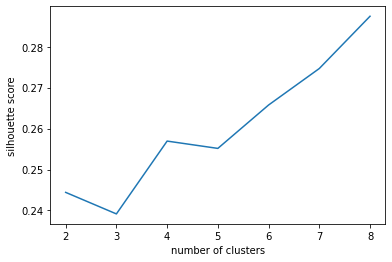

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(2, 9), silhouette_scores)
plt.xlabel("number of clusters")
plt.ylabel("silhouette score")
plt.show()

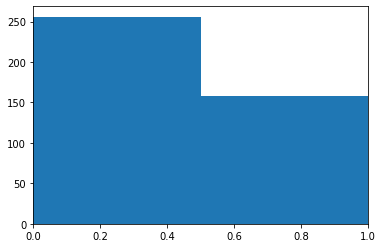

In [ ]:
cluster_labels = km.labels_
plt.hist(cluster_labels, bins=2, range=(0, 1))
plt.xlim(0, 1)
plt.show()